In [8]:
import pandas as pd
import tensorflow as tf
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import display
import ipywidgets as widgets
import threading

In [9]:
model = tf.keras.models.load_model('faces.keras')

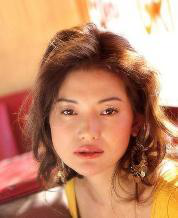

In [19]:
imgs_path=('img_align_celeba/img_align_celeba/200999.jpg')
img=Image.open(imgs_path)
img

In [5]:
# Initialize the webcam
cap = cv2.VideoCapture(0) 

# Check if the webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Read and display frames from the webcam
while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break

    cv2.imshow('Webcam', frame)

    # Exit on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()

In [ ]:
# cap = cv2.VideoCapture(0)
# cap.set(3,640) # adjust width
# cap.set(4,480) # adjust height

# while True:
#     success, img = cap.read()
#     cv2.imshow("Webcam", img) # This will open an independent window
#     if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
#         cap.release()
#         break
        
# cv2.destroyAllWindows() 
# cv2.waitKey(1) # normally unnecessary, but it fixes a bug on MacOS where the window doesn't close


In [13]:
Image.open(frame)

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [12]:
target_size=(64,64)
resized_imgs =frame.resize(target_size, resample = Image.LANCZOS)
float_images = np.array(resized_imgs).astype(np.float32)
normalized=float_images/255
normalized.shape

TypeError: 'resample' is an invalid keyword argument for this function

In [22]:
image=np.array(normalized)

In [23]:
image=np.expand_dims(image,0)

In [24]:
image.shape

(1, 64, 64, 3)

In [25]:
model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[array([[0.0001886]], dtype=float32), array([[4.9978915e-08]], dtype=float32)]